In [ ]:
import os
import random
from itertools import combinations
import numpy as np

def create_siamese_pairs(data_dir, num_positive_pairs, num_negative_pairs):
    """
    Create pairs of images for a Siamese network from a dataset with a given structure.

    Args:
        data_dir (str): Path to the dataset directory. It should contain subdirectories for each class.
        num_positive_pairs (int): Number of positive pairs to generate per class.
        num_negative_pairs (int): Total number of negative pairs to generate.

    Returns:
        tuple: A tuple containing two numpy arrays:
               - pairs: Array of tuples (img1_path, img2_path).
               - labels: Array of labels (1 for positive pairs, 0 for negative pairs).
    """

    # Get list of classes
    classes = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
    unique_labels = set(classes)  # Using set to ensure uniqueness
    num_unique_labels = len(unique_labels)

    # Print the unique labels and their count
    print("Unique labels:", unique_labels)
    print("Number of unique labels:", num_unique_labels)

    # Store images for each class
    class_images = {}
    for cls in classes:
        class_images[cls] = [os.path.join(data_dir, cls, img) for img in os.listdir(os.path.join(data_dir, cls))]

    # Create positive pairs
    pairs = []
    labels = []
    for cls, images in class_images.items():
        if len(images) < 2:
            continue  # Skip classes with less than 2 images
        # Generate all possible combinations of images within the same class
        pos_pairs = list(combinations(images, 2))
        random.shuffle(pos_pairs)  # Shuffle to ensure randomness
        selected_pos_pairs = pos_pairs[:num_positive_pairs]
        pairs.extend([(img1, img2) for img1, img2 in selected_pos_pairs])
        labels.extend([1] * len(selected_pos_pairs))

    # Create negative pairs
    all_images = [(cls, img) for cls, imgs in class_images.items() for img in imgs]
    random.shuffle(all_images)
    neg_pairs = set()
    while len(neg_pairs) < num_negative_pairs:
        cls1, img1 = random.choice(all_images)
        cls2, img2 = random.choice(all_images)
        if cls1 != cls2:
            neg_pairs.add((img1, img2))

    pairs.extend(neg_pairs)
    labels.extend([0] * len(neg_pairs))

    # Convert to numpy arrays
    pairs_array = np.array(pairs)
    labels_array = np.array(labels)

    return pairs_array, labels_array

# Example usage:
#data_directory = '/content/directory/train'
#pairs, labels = create_siamese_pairs(data_directory)

#print(pairs)  # Array of pairs (img1_path, img2_path)
#print(labels) # Array of labels



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install rarfile
!apt-get install unrar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [3]:
import rarfile
import os

# Provide the path to the .rar file
rar_file_path = '/content/drive/MyDrive/cub.rar'
extract_dir = '/content/extracted_files'  # Directory where you want to extract files

# Ensure the extraction directory exists
os.makedirs(extract_dir, exist_ok=True)

# Open the .rar file and extract it
with rarfile.RarFile(rar_file_path) as rf:
    rf.extractall(path=extract_dir)

# Verify the contents
!ls /content/extracted_files


images


In [ ]:
import os
import shutil
import random

original_dir = '/content/extracted_files/images'  # Update with your dataset directory
train_dir = '/content/cub_train'  # Directory for training images
test_dir = '/content/cub_test'    # Directory for testing images

In [ ]:
# List all the class folders
all_classes = os.listdir(original_dir)

# Select 80 random classes
selected_classes = random.sample(all_classes, 80)

# Split into 60 for training and 20 for testing
train_classes = selected_classes[:60]
test_classes = selected_classes[60:]


In [ ]:
# Copy selected training classes to the train directory
for cls in train_classes:
    src_path = os.path.join(original_dir, cls)
    dest_path = os.path.join(train_dir, cls)
    shutil.copytree(src_path, dest_path)

# Copy selected testing classes to the test directory
for cls in test_classes:
    src_path = os.path.join(original_dir, cls)
    dest_path = os.path.join(test_dir, cls)
    shutil.copytree(src_path, dest_path)
    # List the contents of the train and test directories to verify the split
print("Training Classes:", os.listdir(train_dir))
print("Testing Classes:", os.listdir(test_dir))



Training Classes: ['072.Pomarine_Jaeger', '154.Red_eyed_Vireo', '021.Eastern_Towhee', '137.Cliff_Swallow', '045.Northern_Fulmar', '135.Bank_Swallow', '103.Sayornis', '171.Myrtle_Warbler', '024.Red_faced_Cormorant', '182.Yellow_Warbler', '019.Gray_Catbird', '073.Blue_Jay', '082.Ringed_Kingfisher', '147.Least_Tern', '129.Song_Sparrow', '156.White_eyed_Vireo', '065.Slaty_backed_Gull', '197.Marsh_Wren', '036.Northern_Flicker', '086.Pacific_Loon', '106.Horned_Puffin', '165.Chestnut_sided_Warbler', '119.Field_Sparrow', '047.American_Goldfinch', '139.Scarlet_Tanager', '144.Common_Tern', '011.Rusty_Blackbird', '003.Sooty_Albatross', '157.Yellow_throated_Vireo', '037.Acadian_Flycatcher', '075.Green_Jay', '001.Black_footed_Albatross', '020.Yellow_breasted_Chat', '009.Brewer_Blackbird', '018.Spotted_Catbird', '044.Frigatebird', '120.Fox_Sparrow', '087.Mallard', '091.Mockingbird', '061.Heermann_Gull', '169.Magnolia_Warbler', '056.Pine_Grosbeak', '187.American_Three_toed_Woodpecker', '195.Carolina_

In [ ]:
import os

def count_subdirectories(directory):
    subdirs = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]
    return len(subdirs)

# Example usage
directory = '/content/cub_train'
total_subdirectories = count_subdirectories(directory)
print(f"Total number of subdirectories in '{directory}': {total_subdirectories}")

Total number of subdirectories in '/content/cub_train': 60


Extraction from tar file to directory

In [ ]:
import tarfile
tar_file_path = '/content/cifar_fs_test.tar'
# Directory where to extract
extract_dir = '/content/dir'

# Extract the .tar file
with tarfile.open(tar_file_path, 'r') as tar:
    tar.extractall(path=extract_dir)

In [ ]:
import tarfile
tar_file_path = '/content/cifar_fs_train.tar'
# Directory where to extract
extract_dir = '/content/dir'

# Extract the .tar file
with tarfile.open(tar_file_path, 'r') as tar:
    tar.extractall(path=extract_dir)

Episode Generation

In [ ]:
import os
import random

def generate_episode(data_dir, num_classes, num_support_samples , seed):
    """
    Generate a single episode with a given number of pairs, with reproducibility using a seed.

    Args:
        data_dir (str): Path to the dataset directory. It should contain subdirectories for each class.
        num_classes (int): Number of classes to select for the episode.
        num_support_samples (int): Number of support samples to select per class.
        num_pairs (int): Total number of pairs to generate in the episode.
        seed (int, optional): Seed for reproducibility.

    Returns:
        list: A list of tuples (img1_path, img2_path) for the episode.
        list: A list of labels (1 for positive pairs, 0 for negative pairs).
    """
    if seed is not None:
        random.seed(seed)

    # Get list of classes
    classes = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]

    # Randomly select num_classes
    selected_classes = random.sample(classes, num_classes)

    # Dictionary to hold images for selected classes
    selected_images = {}
    for cls in selected_classes:
        images = [os.path.join(data_dir, cls, img) for img in os.listdir(os.path.join(data_dir, cls))]
        selected_images[cls] = images

    # Select multiple support samples per class
    support_samples = []
    for cls, images in selected_images.items():
        selected_support_images = random.sample(images, num_support_samples)
        for support_image in selected_support_images:
            support_samples.append((support_image, cls))

    # Select one query image from one of the selected classes
    query_class = random.choice(selected_classes)
    query_image = random.choice(selected_images[query_class])  # query path

    # Create pairs
    pairs = []
    labels = []

    # Generate pairs between query image and each support image
    for support_image, support_class in support_samples:
        pairs.append((query_image, support_image))
        labels.append(1 if support_class == query_class else 0)

    return pairs, labels

# Example usage
#data_dir = '/content/directory/test'
#episode_pairs, episode_labels = generate_episode(data_dir, num_classes=5, num_support_samples=3, seed=42)

#print("Pairs:")
#for p in episode_pairs:
 #   print(p)
#print("Labels:")
#print(episode_labels)


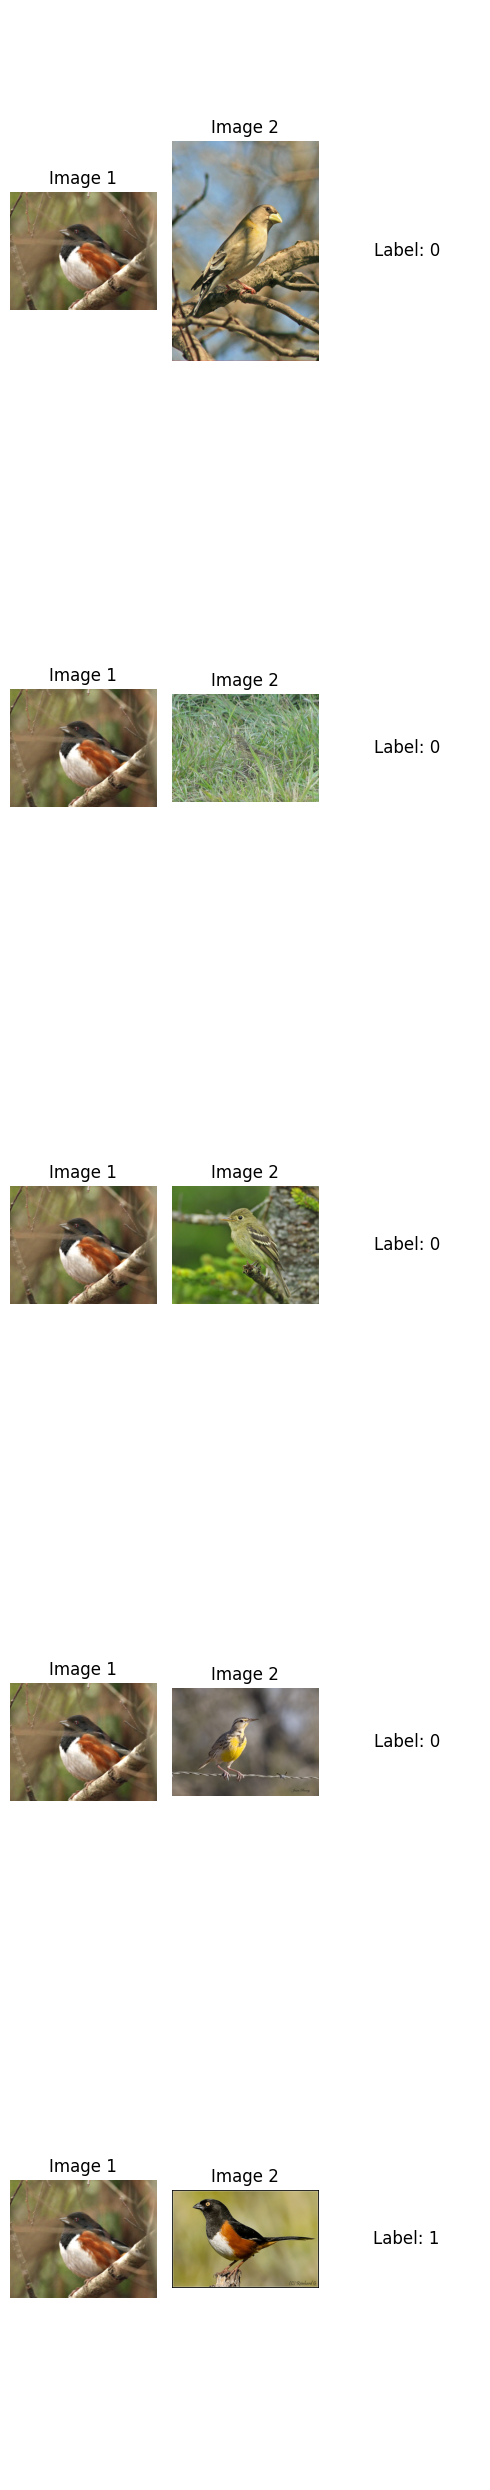

[('/content/cub_test/021.Eastern_Towhee/Eastern_Towhee_0042_22155.jpg', '/content/cub_test/055.Evening_Grosbeak/Evening_Grosbeak_0005_37331.jpg'), ('/content/cub_test/021.Eastern_Towhee/Eastern_Towhee_0042_22155.jpg', '/content/cub_test/104.American_Pipit/American_Pipit_0098_99986.jpg'), ('/content/cub_test/021.Eastern_Towhee/Eastern_Towhee_0042_22155.jpg', '/content/cub_test/043.Yellow_bellied_Flycatcher/Yellow_Bellied_Flycatcher_0060_42595.jpg'), ('/content/cub_test/021.Eastern_Towhee/Eastern_Towhee_0042_22155.jpg', '/content/cub_test/088.Western_Meadowlark/Western_Meadowlark_0076_77811.jpg'), ('/content/cub_test/021.Eastern_Towhee/Eastern_Towhee_0042_22155.jpg', '/content/cub_test/021.Eastern_Towhee/Eastern_Towhee_0021_22152.jpg')]
[0, 0, 0, 0, 1]


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def visualize_pairs(pairs, labels):
    """
    Visualize image pairs alongside their labels.

    Args:
        pairs (list): List of tuples where each tuple contains two image paths.
        labels (list): List of labels corresponding to each pair (1 for positive, 0 for negative).
    """
    num_pairs = len(pairs)
    fig, axes = plt.subplots(num_pairs, 3, figsize=(5, num_pairs * 5))

    for i, (img1_path, img2_path) in enumerate(pairs):
        img1 = Image.open(img1_path)
        img2 = Image.open(img2_path)
        label = labels[i]

        axes[i, 0].imshow(img1)
        axes[i, 0].axis('off')
        axes[i, 0].set_title('Image 1')

        axes[i, 1].imshow(img2)
        axes[i, 1].axis('off')
        axes[i, 1].set_title('Image 2')

        axes[i, 2].text(0.5, 0.5, 'Label: {}'.format(label), fontsize=12, ha='center', va='center')
        axes[i, 2].axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
data_dir = '/content/cub_test'
pairs, labels = generate_episode(data_dir, num_classes=5, num_support_samples=1 , seed=None)
visualize_pairs(pairs, labels)
print(pairs)
print(labels)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets
from PIL import Image


class SiameseNetworkDataset(Dataset):
    def __init__(self, pairs, labels, transform):
        self.pairs = pairs
        self.labels = labels
        self.transform = transform

    def __getitem__(self, index):
        img1_path, img2_path = self.pairs[index]
        img1 = Image.open(img1_path).convert('RGB')
        img2 = Image.open(img2_path).convert('RGB') ##Convert path to actual image ##

        if self.transform:
            img1 = self.transform(img1)
            img2 = self.transform(img2)

        label = torch.FloatTensor([self.labels[index]])
        return img1, img2, label

    def __len__(self):
        return len(self.pairs)

# Example transforms
transform = transforms.Compose([
    transforms.Resize((84,84)),
    transforms.ToTensor()
])

In [ ]:
from torchvision.models import resnet18,resnet34,efficientnet_b0
import torch.nn.functional as F
def cosine_similarity(x1, x2):
    return F.cosine_similarity(x1, x2)
class SiameseNetwork(nn.Module):
    def __init__(self, pretrained=True):
        super(SiameseNetwork, self).__init__()
        resnet = resnet34(pretrained=pretrained)
        self.backbone = nn.Sequential(*list(resnet.children())[:-1])  # Remove the last classification layer- i only need the backbone
        #self.fc1 = nn.Linear(1, 16)
        #self.relu = nn.ReLU()
        ####self.fc2 = nn.Linear(16, 1)
       # self.sigmoid = nn.Sigmoid()

        #self.fc = nn.Linear(1, 1)  # Add a fully connected layer with 1 output
        #self.sigmoid = nn.Sigmoid()

    def forward_one(self, x):
        x = self.backbone(x)
        x = x.view(x.size(0), -1)  # Flatten the output
        x = F.normalize(x, p=2, dim=1)  # L2 normalize the embeddings
        return x

    def forward(self, input1, input2):
        output1 = self.forward_one(input1)
        output2 = self.forward_one(input2)
        #print('Shape after feature extraction: ',output1.shape)
        return output1,output2

In [ ]:
model = SiameseNetwork().cuda()
##for name, param in model.named_parameters():
   # print(f"{name}: requires_grad={param.requires_grad}")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Contrastive l.f.

In [ ]:
import torch
import torch.nn as nn

class ContrastiveLoss(nn.Module):
    def __init__(self, margin):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
        # Compute the Euclidean distance between the two embeddings
        euclidean_distance = torch.nn.functional.pairwise_distance(output1, output2, keepdim=True)
        #print(euclidean_distance)

        # Compute the contrastive loss
        loss_contrastive = torch.mean(
            label * torch.pow(euclidean_distance, 2) +  # For similar pairs
            (1 - label) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2)  # For dissimilar pairs
        )

        return loss_contrastive



Train Network after placing pairs inside data loader

In [ ]:
def train_siamese_network(model, dataloader, num_epochs=3):
    criterion = nn.BCELoss()
    criterion = ContrastiveLoss(margin=0.75)
    optimizer = optim.Adam(model.parameters(), lr=5e-5)
    model.train()

    for epoch in range(num_epochs):
        for i, (img1, img2, label) in enumerate(dataloader):
            img1, img2, label = img1.cuda(),img2.cuda(),label.cuda()

            optimizer.zero_grad()
            out1,out2 = model(img1, img2)
            loss = criterion(out1,out2, label)
            loss.backward()
            optimizer.step()

            if i % 240 == 0:
                print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i}/{len(dataloader)}], Loss: {loss.item():.4f}")

# Instantiate and train the model
data_directory = '/content/dir/train'
pairs, labels = create_siamese_pairs(data_directory,num_positive_pairs=300,num_negative_pairs=19200)
dataset = SiameseNetworkDataset(pairs, labels, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)
num_batches = len(dataloader)

print(f"Number of batches: {num_batches}")
train_siamese_network(model, dataloader)

Unique labels: {'n00000037', 'n00000005', 'n00000010', 'n00000058', 'n00000071', 'n00000067', 'n00000068', 'n00000054', 'n00000069', 'n00000062', 'n00000012', 'n00000052', 'n00000070', 'n00000061', 'n00000085', 'n00000086', 'n00000008', 'n00000090', 'n00000027', 'n00000089', 'n00000057', 'n00000059', 'n00000091', 'n00000087', 'n00000028', 'n00000083', 'n00000041', 'n00000048', 'n00000056', 'n00000020', 'n00000044', 'n00000040', 'n00000053', 'n00000025', 'n00000029', 'n00000033', 'n00000047', 'n00000032', 'n00000051', 'n00000000', 'n00000049', 'n00000022', 'n00000013', 'n00000060', 'n00000039', 'n00000017', 'n00000001', 'n00000084', 'n00000009', 'n00000092', 'n00000081', 'n00000078', 'n00000016', 'n00000073', 'n00000082', 'n00000093', 'n00000094', 'n00000023', 'n00000096', 'n00000076'}
Number of unique labels: 60
Number of batches: 1163
Epoch [1/3], Step [0/1163], Loss: 0.5280
Epoch [1/3], Step [240/1163], Loss: 0.0924
Epoch [1/3], Step [480/1163], Loss: 0.0962
Epoch [1/3], Step [720/11

Evaluate

In [ ]:

import torch
from torchvision import transforms
from PIL import Image
import torch
from torchvision import transforms
from PIL import Image

def evaluate_siamese_network(model, pairs, labels, transform, device):
    model.eval()

    cumulative_scores = []  # List to store cumulative scores for each group of 5 samples
    current_score = 0.0  # Variable to keep track of the score within a group
    pair_count = 0  # Counter for the current pair in the group
    group_labels = []  # List to store labels for each group of 5 pairs

    with torch.no_grad():
        for index, (img1_path, img2_path) in enumerate(pairs):
            # Load and transform images
            img1 = Image.open(img1_path).convert('RGB')
            img2 = Image.open(img2_path).convert('RGB')
            img1 = transform(img1).unsqueeze(0).to(device)
            img2 = transform(img2).unsqueeze(0).to(device)

            # Forward pass through the network
            output1, output2 = model(img1, img2)
            distance = torch.nn.functional.pairwise_distance(output1, output2, keepdim=True)
            #print(distance)

            # Calculate the score as 1/distance and add to the current group's score
            score = 1 / distance.item()
            current_score += score
            pair_count += 1

            # Check if we've reached 5 pairs (one group)
            if pair_count == 1:
                # Store the cumulative score and corresponding labels for the group
                cumulative_scores.append(current_score)
                group_labels.append(labels[index])  # We use the label of the last pair in the group
                current_score = 0.0
                pair_count = 0

            # Print the score for this pair
            #print(f"Pair {index+1}: Score = {score:.4f}")

    # If there are any remaining scores that haven't been added (in case total pairs aren't a multiple of 5)
    #if pair_count > 0:
     #   cumulative_scores.append(current_score)
      #  group_labels.append(labels[-1])  # Last group's label

    # Print the cumulative scores for each group
    #print("\nCumulative scores for each group of 5 pairs:")
    #for i, score in enumerate(cumulative_scores):
     #   print(f"Group {i+1}: Cumulative Score = {score:.4f}, Label: {group_labels[i]}")

    # Find the group with the highest cumulative score
    best_group_index = cumulative_scores.index(max(cumulative_scores))

    # Check if the highest score corresponds to the group with label 1
    is_correct = group_labels[best_group_index] == 1

    return best_group_index, cumulative_scores, is_correct

# Example usage
data_dir = '/content/dir/test'
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((84,84))
])
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Generate and evaluate multiple episodes
correct = 0
wrong = 0
from tqdm import tqdm
for i in tqdm(range(7500), desc="Processing episodes"):
    episode_pairs, binary_labels = generate_episode(data_dir, num_classes=5, num_support_samples=1, seed=i)
    best_group_index, cumulative_scores, is_correct = evaluate_siamese_network(model, episode_pairs, binary_labels, transform, device)

    if is_correct:
        correct += 1
    else:
        wrong += 1

print(f"\nTotal Correct: {correct}")
print(f"Total Wrong: {wrong}")



Processing episodes: 100%|██████████| 7500/7500 [08:01<00:00, 15.57it/s]


Total Correct: 2486
Total Wrong: 5014


In [ ]:
correct = 0
wrong = 0
from tqdm import tqdm
for i in tqdm(range(7500), desc="Processing episodes"):
    episode_pairs, binary_labels = generate_episode(data_dir, num_classes=5, num_support_samples=1, seed=i)
    best_group_index, cumulative_scores, is_correct = evaluate_siamese_network(model, episode_pairs, binary_labels, transform, device)

    if is_correct:
        correct += 1
    else:
        wrong += 1

print(f"\nTotal Correct: {correct}")
print(f"Total Wrong: {wrong}")

Processing episodes: 100%|██████████| 7500/7500 [07:55<00:00, 15.78it/s]


Total Correct: 2552
Total Wrong: 4948


In [ ]:
print(round((correct/(correct+wrong)),4))

0.3403


In [ ]:
    import math
    acc=correct/(correct+wrong)
    #print(round(acc,5))
    SE=acc*(1-acc)/(correct+wrong)
    SE=math.sqrt(SE)
    margin_error=1.96*SE
    print(round(margin_error,5))

0.01062
